# Data wsbd

In [1]:
from datetime import date
from kiwis_pie import KIWIS

k = KIWIS('http://10.10.3.126:8080/KiWIS/KiWIS') # set kiwis server

In [2]:
mtpnt = {'Q': ['4510_TDB', '4286_TDB', '4501_TDB', '7500_TDB', '7501_TDB', '0705_TDB'], 'WT': ['4510_WTH_BOV', '4510_WTH_BEN', '7501_WTH_BEN', '4512_WTH', '1900_WTH', '4513_WTH', '0704_WTH', '0705_WTH_BOV', '7502_WTH_BOV'], 'KL': ['4510_KSF'], 'WKL': ['0714_WKL', '0703_WKL', '0702_WKL', '0701_WKL', '0707_WKL']}

##  Afvoeren (TDB)

Afvoeren									
Inlaat Oosterhout	-	-	-	15 min	4-6-1996	31-12-2019	-	-	-  
Bovenmark (Blauwe Kamer; 4286)	-	-	-	15 min	1-1-2000	31-12-2019	-	-	-  
Aa of Weerijs (Oranjeboombrug; 4501)	-	-	-	15 min	1-1-1996	31-12-2019	-	-	-  
Molenbeek (Zuidrand Roosendaal; 7500)	-	-	-	15 min	26-10-2009	31-12-2019	-	-	-  
Dintelsas (7501)	-	-	-	15 min	1-1-1996	31-12-2019	-	-	-  
Benedensas (0705)	-	-	-	15 min	1-3-2013	31-12-2019	-	-	-  


In [3]:
tdb_timeseries = k.get_timeseries_list(stationparameter_name='Debiet', ts_name='ContinueMeting.P') # all discharge stations, with series ContinueMeting.P (15 min)

In [4]:
import pandas as pd

wsbd = pd.DataFrame()
for station_no in mtpnt.get('Q'):
    ts_id = tdb_timeseries.loc[tdb_timeseries.station_no == station_no]['ts_id'].values[0] # select ts_id
    series = k.get_timeseries_values(ts_id=ts_id, **{'from': date(1996,1,1)}) # get series from 1-1-1996
    series.index = series.index.tz_localize(None) # to get rid of the timezone
    series.columns = [station_no]
    wsbd = pd.concat([wsbd, series], axis=1)

In [5]:
wsbd.head()

4510_TDB  4286_TDB  4501_TDB  7500_TDB  7501_TDB  \
Timestamp                                                               
1996-01-01 00:00:00       NaN      0.77     1.172       NaN     4.856   
1996-01-01 00:15:00       NaN      0.83     1.172       NaN     7.077   
1996-01-01 00:30:00       NaN      0.90     1.172       NaN     9.074   
1996-01-01 00:45:00       NaN      0.95     1.172       NaN     7.127   
1996-01-01 01:00:00       NaN      1.00     1.172       NaN     3.308   

                     0705_TDB  
Timestamp                      
1996-01-01 00:00:00       NaN  
1996-01-01 00:15:00       NaN  
1996-01-01 00:30:00       NaN  
1996-01-01 00:45:00       NaN  
1996-01-01 01:00:00       NaN

## Waterhoogte (WTH)

Waterstanden									
Oosterhout inlaatduiker Hbov (4510)	-	-	-	15 min	1-1-1996	31-12-2019	-	-	-  
Oosterhout inlaatduiker Hben (4510)	-	-	-	15 min	1-1-1996	31-12-2019	-	-	-  
Dintelsas Hben (7501)	-	-	-	15 min	1-1-1996	31-12-2019	-	-	-  


In [7]:
wth_timeseries = k.get_timeseries_list(stationparameter_name='Waterhoogte', ts_name='ContinueMeting.P') # all discharge stations, with series ContinueMeting.P (15 min)

In [8]:
for station_no in mtpnt.get('WT'):
    ts_id = wth_timeseries.loc[wth_timeseries.station_no == station_no]['ts_id'].values[0] # select ts_id
    series = k.get_timeseries_values(ts_id=ts_id, **{'from': date(1996,1,1)}) # get series from 1-1-1996
    series.index = series.index.tz_localize(None) # to get rid of the timezone
    series.columns = [station_no]
    wsbd = pd.concat([wsbd, series], axis=1)

In [9]:
wsbd.head()

4510_TDB  4286_TDB  4501_TDB  7500_TDB  7501_TDB  \
Timestamp                                                               
1996-01-01 00:00:00       NaN      0.77     1.172       NaN     4.856   
1996-01-01 00:15:00       NaN      0.83     1.172       NaN     7.077   
1996-01-01 00:30:00       NaN      0.90     1.172       NaN     9.074   
1996-01-01 00:45:00       NaN      0.95     1.172       NaN     7.127   
1996-01-01 01:00:00       NaN      1.00     1.172       NaN     3.308   

                     0705_TDB  4510_WTH_BOV  4510_WTH_BEN  7501_WTH_BEN  \
Timestamp                                                                 
1996-01-01 00:00:00       NaN           NaN        -0.004        -0.007   
1996-01-01 00:15:00       NaN           NaN        -0.006        -0.009   
1996-01-01 00:30:00       NaN           NaN        -0.013        -0.016   
1996-01-01 00:45:00       NaN           NaN        -0.023        -0.018   
1996-01-01 01:00:00       NaN           NaN        -0.020        -0.019   

                     4512_WTH  1900_WTH  4513_WTH  0704_WTH  0705_WTH_BOV  \
Timestamp                                                                   
1996-01-01 00:00:00    -0.019    -0.016    -0.016       NaN        -0.013   
1996-01-01 00:15:00    -0.017    -0.019    -0.015       NaN        -0.014   
1996-01-01 00:30:00    -0.021    -0.019    -0.016       NaN        -0.014   
1996-01-01 00:45:00    -0.028    -0.017    -0.015       NaN        -0.013   
1996-01-01 01:00:00    -0.030    -0.017    -0.013       NaN        -0.013   

                     7502_WTH_BOV  
Timestamp                          
1996-01-01 00:00:00        -0.015  
1996-01-01 00:15:00        -0.019  
1996-01-01 00:30:00        -0.018  
1996-01-01 00:45:00        -0.018  
1996-01-01 01:00:00        -0.014

## Hefhoogte (KSF)
Klep/schuifstanden									
Inlaat Oosterhout	-	-	-	15 min	1-1-2005	31-12-2019	-	-	-  
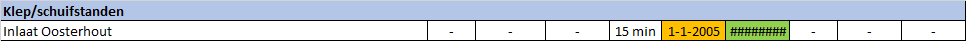

In [10]:
kkl_timeseries = k.get_timeseries_list(stationparameter_name='Hefhoogte', ts_name='ContinueMeting.P') # all discharge stations, with series ContinueMeting.P (15 min)

In [11]:
for station_no in mtpnt.get('KL'):
    ts_id = kkl_timeseries.loc[kkl_timeseries.station_no == station_no]['ts_id'].values[0] # select ts_id
    series = k.get_timeseries_values(ts_id=ts_id, **{'from': date(1996,1,1)}) # get series from 1-1-1996
    series.index = series.index.tz_localize(None) # to get rid of the timezone
    series.columns = [station_no]
    wsbd = pd.concat([wsbd, series], axis=1)

In [12]:
wsbd.head()

4510_TDB  4286_TDB  4501_TDB  7500_TDB  7501_TDB  \
Timestamp                                                               
1996-01-01 00:00:00       NaN      0.77     1.172       NaN     4.856   
1996-01-01 00:15:00       NaN      0.83     1.172       NaN     7.077   
1996-01-01 00:30:00       NaN      0.90     1.172       NaN     9.074   
1996-01-01 00:45:00       NaN      0.95     1.172       NaN     7.127   
1996-01-01 01:00:00       NaN      1.00     1.172       NaN     3.308   

                     0705_TDB  4510_WTH_BOV  4510_WTH_BEN  7501_WTH_BEN  \
Timestamp                                                                 
1996-01-01 00:00:00       NaN           NaN        -0.004        -0.007   
1996-01-01 00:15:00       NaN           NaN        -0.006        -0.009   
1996-01-01 00:30:00       NaN           NaN        -0.013        -0.016   
1996-01-01 00:45:00       NaN           NaN        -0.023        -0.018   
1996-01-01 01:00:00       NaN           NaN        -0.020        -0.019   

                     4512_WTH  1900_WTH  4513_WTH  0704_WTH  0705_WTH_BOV  \
Timestamp                                                                   
1996-01-01 00:00:00    -0.019    -0.016    -0.016       NaN        -0.013   
1996-01-01 00:15:00    -0.017    -0.019    -0.015       NaN        -0.014   
1996-01-01 00:30:00    -0.021    -0.019    -0.016       NaN        -0.014   
1996-01-01 00:45:00    -0.028    -0.017    -0.015       NaN        -0.013   
1996-01-01 01:00:00    -0.030    -0.017    -0.013       NaN        -0.013   

                     7502_WTH_BOV  4510_KSF  
Timestamp                                    
1996-01-01 00:00:00        -0.015       NaN  
1996-01-01 00:15:00        -0.019       0.0  
1996-01-01 00:30:00        -0.018       0.0  
1996-01-01 00:45:00        -0.018       0.0  
1996-01-01 01:00:00        -0.014       0.0

# Waterkwaliteit (WKL)

In [13]:
wkl_timeseries = k.get_timeseries_list(stationparameter_name='Temperatuur', ts_name='ContinueMeting.P') # all discharge stations, with series ContinueMeting.P (15 min)

In [14]:
for station_no in mtpnt.get('WKL'):
    ts_id = wkl_timeseries.loc[wkl_timeseries.station_no == station_no]['ts_id'].values[0] # select ts_id
    series = k.get_timeseries_values(ts_id=ts_id, **{'from': date(1996,1,1)}) # get series from 1-1-1996
    series.index = series.index.tz_localize(None) # to get rid of the timezone
    series.columns = [station_no]
    wsbd = pd.concat([wsbd, series], axis=1)

# Data

In [15]:
wsbd.describe()

4510_TDB       4286_TDB       4501_TDB       7500_TDB  \
count  779095.000000  853201.000000  738613.000000  372676.000000   
mean        1.549582       3.384907       2.679828       0.448941   
std         3.017759       4.268683       3.662873       0.611682   
min         0.000000       0.000000      -0.311000       0.000000   
25%         0.000000       1.080000       0.793000       0.100000   
50%         0.000000       1.950000       1.450000       0.270000   
75%         0.000000       3.960000       3.024000       0.540000   
max        12.141000      48.670000      62.970000       8.410000   

           7501_TDB       0705_TDB   4510_WTH_BOV   4510_WTH_BEN  \
count  1.108814e+06  674351.000000  787470.000000  840947.000000   
mean   1.105271e+01       2.753395       0.545218       0.103108   
std    1.462620e+01       3.785210       0.246808       0.122604   
min   -8.426600e+01     -30.598000      -0.322000      -0.251000   
25%    2.384000e+00       0.376000       0.379000       0.035000   
50%    7.352000e+00       2.162000       0.517000       0.091000   
75%    1.451700e+01       4.693000       0.673000       0.144000   
max    1.599000e+02      39.965000       2.158000       1.469000   

        7501_WTH_BEN       4512_WTH  ...       4513_WTH       0704_WTH  \
count  992092.000000  612592.000000  ...  854060.000000  513375.000000   
mean        0.043161       0.060513  ...       0.095630       0.015019   
std         0.064697       0.074554  ...       0.131714       0.062433   
min        -0.188000      -0.200000  ...      -0.239000      -0.376000   
25%        -0.002000       0.014000  ...       0.021000      -0.028000   
50%         0.043000       0.070000  ...       0.081000       0.010000   
75%         0.091000       0.109000  ...       0.138000       0.048000   
max         0.420000       0.550000  ...       1.597000       0.400000   

        0705_WTH_BOV   7502_WTH_BOV       4510_KSF      0714_WKL  \
count  743917.000000  773786.000000  541838.000000  89331.000000   
mean        0.045656       0.067719       0.327678     13.023224   
std         0.065317       0.069811       0.557673      6.654505   
min        -0.182000      -0.199000       0.000000      0.100000   
25%         0.004000       0.026000       0.000000      6.900000   
50%         0.050000       0.074000       0.000000     12.800000   
75%         0.093000       0.114000       1.000000     19.600000   
max         0.475000       0.554000       1.784000     26.600000   

            0703_WKL       0702_WKL       0701_WKL       0707_WKL  
count  261346.000000  236080.000000  227374.000000  126330.000000  
mean       13.119714      12.885533      14.018972      12.766660  
std         6.657795       6.651671       6.479900       6.955151  
min        -9.200000      -0.900000      -0.200000      -0.100000  
25%         7.000000       6.900000       8.200000       6.400000  
50%        13.200000      12.900000      14.400000      12.200000  
75%        19.400000      19.200000      19.600000      19.500000  
max        27.800000      27.200000      29.800000      27.200000  

[8 rows x 21 columns]

In [16]:
wsbd.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1470222 entries, 1996-01-01 00:00:00 to 2020-07-08 15:30:00
Data columns (total 21 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   4510_TDB      779095 non-null   float64
 1   4286_TDB      853201 non-null   float64
 2   4501_TDB      738613 non-null   float64
 3   7500_TDB      372676 non-null   float64
 4   7501_TDB      1108814 non-null  float64
 5   0705_TDB      674351 non-null   float64
 6   4510_WTH_BOV  787470 non-null   float64
 7   4510_WTH_BEN  840947 non-null   float64
 8   7501_WTH_BEN  992092 non-null   float64
 9   4512_WTH      612592 non-null   float64
 10  1900_WTH      444649 non-null   float64
 11  4513_WTH      854060 non-null   float64
 12  0704_WTH      513375 non-null   float64
 13  0705_WTH_BOV  743917 non-null   float64
 14  7502_WTH_BOV  773786 non-null   float64
 15  4510_KSF      541838 non-null   float64
 16  0714_WKL      89331 non-null    float64

In [17]:
wsbd.reset_index().to_feather('data//wsbd.feather') # save as feather


Bad key "text.dvipnghack" on line 127 in
S:\WinPython 3.6\python-3.6.2.amd64\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key "nbagg.transparent" on line 433 in
S:\WinPython 3.6\python-3.6.2.amd64\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key "animation.mencoder_path" on line 516 in
S:\WinPython 3.6\python-3.6.2.amd64\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.2.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key "an

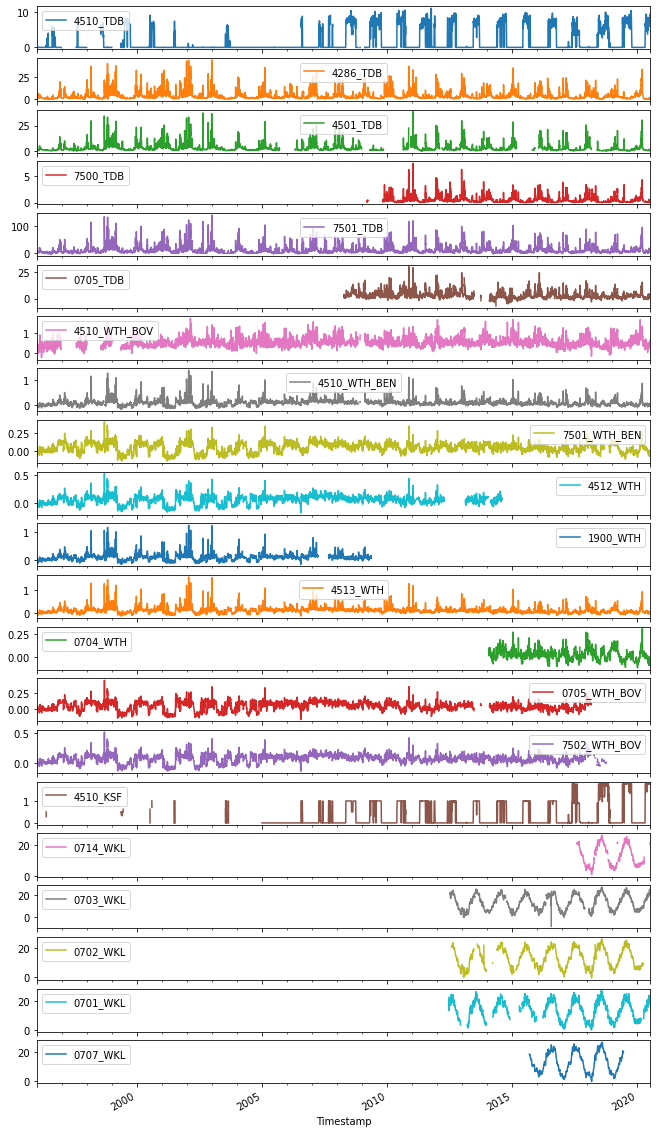

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
wsbd.resample('d').mean().plot(subplots=True, figsize=(11,22)); # just a simple plot

In [19]:
import pandas as pd
wsbd = pd.read_feather('data//wsbd.feather') # load feather
wsbd.set_index('Timestamp', inplace=True) # reset index

In [25]:
import geopandas as gpd
locs = k.get_station_list()
meta = pd.DataFrame()

for i in ['WT', 'Q', 'KL', 'WKL']:
    loc = locs.loc[locs.station_no.isin(mtpnt.get(i)), :].copy()
    loc.at[:, 'GROOTHEID'] = i
    meta = meta.append(loc)
    
meta = meta.reset_index()
for row in range(len(meta)):
    meta.at[row, 'min_date'] = wsbd[meta.iloc[row].loc['station_no']].dropna().index.min()
    meta.at[row, 'max_date'] = wsbd[meta.iloc[row].loc['station_no']].dropna().index.max()
meta = gpd.GeoDataFrame(meta, geometry=gpd.points_from_xy(pd.to_numeric(meta.station_latitude), pd.to_numeric(meta.station_longitude)))
meta.crs = {'init': 'epsg:4326'}

In [26]:
meta

index    station_name    station_no station_id  station_latitude  \
0     248  Benedenstrooms  7501_WTH_BEN      13760  51.6530116433352   
1     254  Benedenstrooms  4510_WTH_BEN      13196  51.6459340175967   
2     574    Bovenstrooms  0705_WTH_BOV      13798  51.6250568337651   
3     724    Bovenstrooms  4510_WTH_BOV      13194   51.645836778696   
4    1366    Bovenstrooms  7502_WTH_BOV      13763  51.5970257888524   
5    8736     Waterhoogte      4513_WTH      13201  51.5934018086409   
6    8805     Waterhoogte      1900_WTH      13318  51.6383488396539   
7    8910     Waterhoogte      0704_WTH      13836  51.5785391809606   
8    8977     Waterhoogte      4512_WTH      13200  51.6228271405155   
9    6710    Totaaldebiet      4510_TDB      13195   51.645859424475   
10   6711    Totaaldebiet      4501_TDB      13179   51.571751069978   
11   6804    Totaaldebiet      7501_TDB      13761  51.6519832648095   
12   6859    Totaaldebiet      7500_TDB      13758  51.5102901399373   
13   7070    Totaaldebiet      0705_TDB      13799  51.6250568337651   
14   7147    Totaaldebiet      4286_TDB      13137  51.5455149408995   
15   6474          Schuif      4510_KSF      13197   51.645836778696   
16   8994  Waterkwaliteit      0702_WKL      12539  51.6447525687472   
17   8996  Waterkwaliteit      0714_WKL      53949  51.6466924157812   
18   8997  Waterkwaliteit      0703_WKL      13225  51.6244878552721   
19   9003  Waterkwaliteit      0707_WKL      37903  51.5815635789204   
20   9005  Waterkwaliteit      0701_WKL      12781  51.4947357407975   

   station_longitude GROOTHEID            min_date            max_date  \
0    4.3775904771177        WT 1996-01-01 00:00:00 2020-07-08 14:00:00   
1   4.83304567342093        WT 1996-01-01 00:00:00 2020-07-08 15:15:00   
2   4.25569034884277        WT 1996-01-01 00:00:00 2018-02-28 00:00:00   
3   4.83448359955694        WT 1996-01-04 16:45:00 2020-07-08 15:15:00   
4   4.37627649038021        WT 1996-01-01 00:00:00 2018-10-05 00:00:00   
5   4.77141407448141        WT 1996-01-01 00:00:00 2020-07-08 15:15:00   
6   4.69477414223162        WT 1996-01-01 00:00:00 2009-05-14 01:00:00   
7   4.43663215264977        WT 2014-01-22 00:15:00 2020-07-08 14:00:30   
8   4.42875722168606        WT 1996-01-01 00:00:00 2014-08-05 00:00:00   
9   4.83425930719606         Q 1996-01-04 16:45:00 2020-07-08 15:15:00   
10  4.75685024143033         Q 1996-01-01 00:00:00 2020-07-08 15:00:00   
11   4.3790074113649         Q 1996-01-01 00:00:00 2020-07-08 14:05:00   
12  4.45515859566987         Q 2009-03-12 14:30:00 2020-07-08 01:00:00   
13  4.25569034884277         Q 2004-12-15 00:15:00 2020-07-08 15:05:00   
14   4.7862921502976         Q 1996-01-01 00:00:00 2020-07-05 23:45:00   
15  4.83448359955694        KL 1996-01-01 00:15:00 2020-07-08 15:30:00   
16  4.39120400249827       WKL 2012-07-31 15:15:00 2020-03-25 15:00:00   
17  4.82234354188866       WKL 2017-08-02 08:15:00 2020-07-08 13:00:00   
18  4.59286867989162       WKL 2012-07-03 12:15:00 2020-07-08 14:00:00   
19  5.03394301322403       WKL 2015-09-09 16:00:00 2019-06-11 13:00:00   
20  4.25357573151866       WKL 2012-06-21 14:15:00 2020-07-08 14:00:00   

                    geometry  
0   POINT (51.65301 4.37759)  
1   POINT (51.64593 4.83305)  
2   POINT (51.62506 4.25569)  
3   POINT (51.64584 4.83448)  
4   POINT (51.59703 4.37628)  
5   POINT (51.59340 4.77141)  
6   POINT (51.63835 4.69477)  
7   POINT (51.57854 4.43663)  
8   POINT (51.62283 4.42876)  
9   POINT (51.64586 4.83426)  
10  POINT (51.57175 4.75685)  
11  POINT (51.65198 4.37901)  
12  POINT (51.51029 4.45516)  
13  POINT (51.62506 4.25569)  
14  POINT (51.54551 4.78629)  
15  POINT (51.64584 4.83448)  
16  POINT (51.64475 4.39120)  
17  POINT (51.64669 4.82234)  
18  POINT (51.62449 4.59287)  
19  POINT (51.58156 5.03394)  
20  POINT (51.49474 4.25358)

In [27]:
import folium
from folium.plugins import MarkerCluster

# initiate map
m = folium.Map(location=[51.6, 4.5], zoom_start=10, tiles='cartodbpositron')

# colors per measurementpoint
coldict = {'WT': 'red',
           'Q': 'green',
           'KL': 'blue',
           'WKL': 'orange'}

# add markers one-by-one
for point in meta.itertuples():
    folium.Marker([point.station_latitude, point.station_longitude], tooltip=folium.Tooltip('<table><tr style="text-align: left;"><th style="padding: 4px; padding-right: 10px;">station no</th><td style="padding: 4px;">{}</td></tr><tr style="text-align: left;"><th style="padding: 4px; padding-right: 10px;">station name</th><td style="padding: 4px;">{}</td></tr><tr style="text-align: left;"><th style="padding: 4px; padding-right: 10px;">min date</th><td style="padding: 4px;">{}</td></tr><tr style="text-align: left;"><th style="padding: 4px; padding-right: 10px;">max date</th><td style="padding: 4px;">{}</td></tr></table>'.format(point.station_no, point.station_name, point.min_date, point.max_date)), icon=folium.Icon(color=coldict.get(point.GROOTHEID), icon='square', prefix='fa', alpha=0.5)).add_to(m)

m.save('meta//wsbd.html')
m